## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
# Write out goal and business information
#Write out summarized approach

In [254]:
#Import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 200)

In [4]:
pip install pandasql

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandasql as sqldf

In [6]:
#Allows querying of dataframe with SQL
#import pandasql as sqldf
#from pandasql import sqldf

In [7]:
#pysqldf = lambda q: sqldf(q, globals())

In [8]:
###q = """
#SELECT 
#*
#FROM movie_basics;
#"""

#bdf = pysqldf(q)

In [9]:
#Create database

conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [10]:
#Gather the table names
#Recommended to only use movie_basics & movie_ratings

cur.execute(

"""
SELECT name

FROM sqlite_master
WHERE type = "table";


"""
)

table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [96]:
#Looking to see if there are any duplicates
q_basics = '''
SELECT
    movie_id,
    start_year,
    primary_title,
    genres,
    COUNT(*) AS CNT
FROM movie_basics
GROUP BY movie_id
HAVING COUNT(*) > 1
ORDER BY movie_id
;
                               '''

pd.read_sql(q_basics, conn)


,movie_id,start_year,primary_title,genres,CNT


In [13]:
#Join Movie_B and ratings
#confirm there are no duplicates by movie_id
#Search for string in the table using WHERE column LIKE "%STRING%"

In [97]:
#Joining movie_b and ratings
#Look at how you can check there is only 1 ROW FOR movie_id

qB1 = """
SELECT
    movie_id,
    start_year,
    primary_title,
    genres,
    averagerating,
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
GROUP BY movie_id
ORDER BY numvotes DESC, averagerating
;
"""
Genre_Ratings= pd.read_sql(qB1,conn)

In [98]:
movieG_df = pd.DataFrame(Genre_Ratings)
movieG_df

,movie_id,start_year,primary_title,genres,averagerating,numvotes
0,tt1375666,2010,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,2012,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,tt0816692,2014,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,2012,Django Unchained,"Drama,Western",8.4,1211405
4,tt0848228,2012,The Avengers,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...
73851,tt4944240,2017,Dog Days in the Heartland,Drama,10.0,5
73852,tt5390098,2015,The Paternal Bond: Barbary Macaques,Documentary,10.0,5
73853,tt6295832,2016,Requiem voor een Boom,Documentary,10.0,5
73854,tt6991826,2015,A Dedicated Life: Phoebe Brand Beyond the Group,Documentary,10.0,5


In [99]:
#spliting the genres into sep rows...get citation for overstack
s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = "genres"

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393/2958226751.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movieG_df["genres"].str.split(",").apply(pd.Series, 1).stack()
/var/folders/77/kvw5t075169_rvys7qfdc_xw0000gn/T/ipykernel_40393

In [17]:
s

0             Action
0          Adventure
0             Sci-Fi
1             Action
1           Thriller
            ...     
73851          Drama
73852    Documentary
73853    Documentary
73854    Documentary
73855    Documentary
Name: genres, Length: 128490, dtype: object

In [100]:
#making it equal to the original name...citation from overstack
del movieG_df["genres"]
movieG1_df = movieG_df.join(s)


In [101]:
movieG1_df = movieG_df.join(s)

In [102]:
movieG1_df = movieG1_df.dropna()

In [105]:
movieG1_df["genres"].unique().sum()


'ActionAdventureSci-FiThrillerDramaWesternBiographyCrimeMysteryComedyFantasyFamilyAnimationRomanceMusicHistoryHorrorSportWarMusicalDocumentaryNewsGame-ShowReality-TVAdultShort'

In [106]:
movieG1_df.describe()



,start_year,averagerating,numvotes
count,128490.000000,128490.000000,1.284900e+05
mean,2014.221021,6.302146,5.337769e+03
std,2.579176,1.457744,3.808942e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.400000,1.600000e+01
50%,2014.000000,6.400000,6.600000e+01
75%,2016.000000,7.300000,4.290000e+02
max,2019.000000,10.000000,1.841066e+06


Text(0.5, 1.0, 'Title Example')

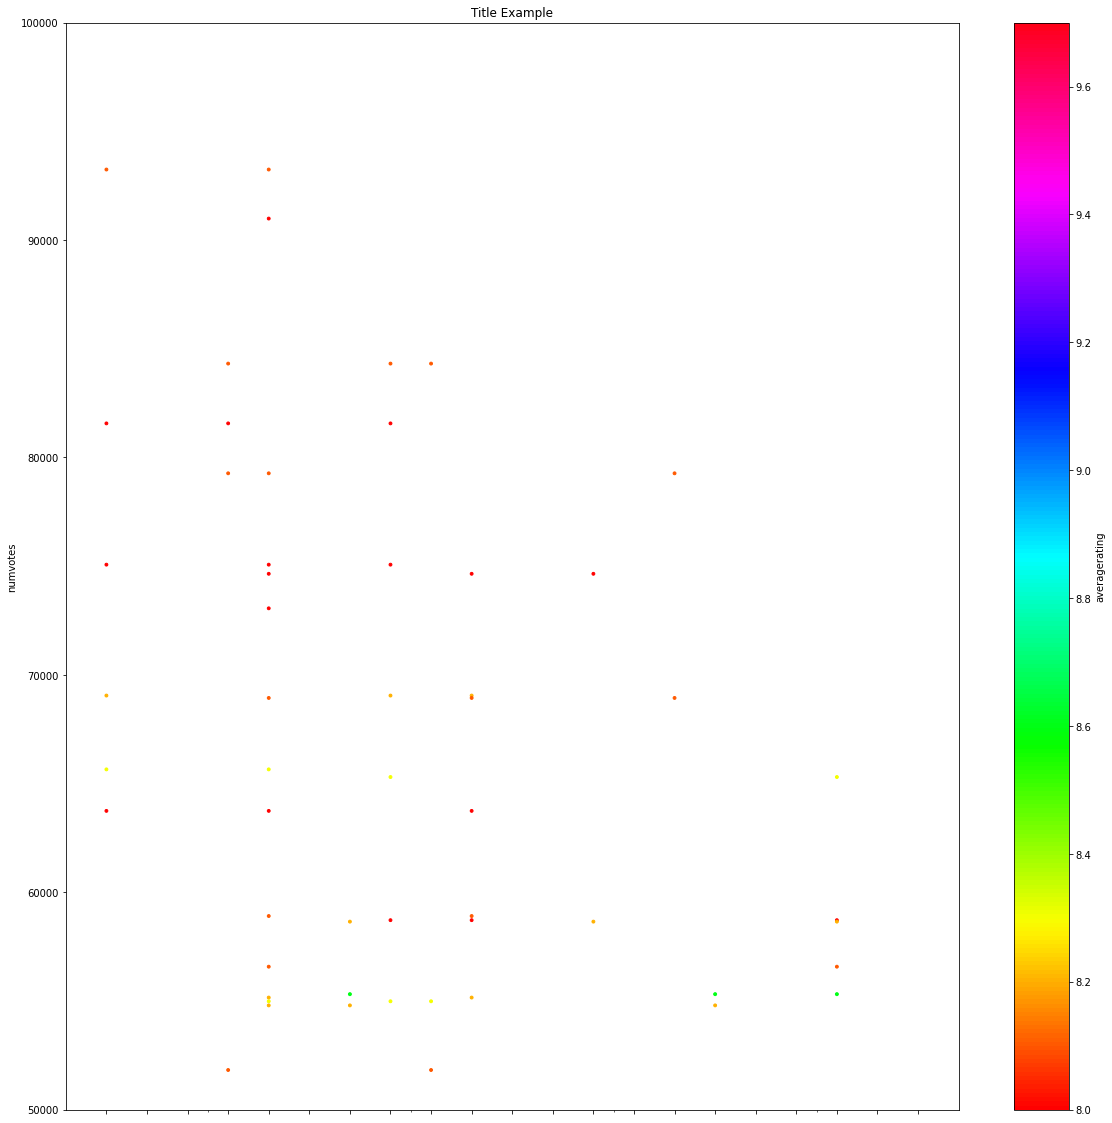

In [400]:
#Checking datatypes..helps to see how I can use the ratings
ax = g.plot.scatter("genres", "numvotes" , c = "averagerating" , s = g["averagerating"], colormap = "hsv",xlabel = "genres", ylim = [50000,100000],  figsize = (20,20))
ax.set_xlabel("Genres")
ax.set_title("Title Example")


In [113]:
#Measures of c
movieG1_df["numvotes"].describe()

count    1.284900e+05
mean     5.337769e+03
std      3.808942e+04
min      5.000000e+00
25%      1.600000e+01
50%      6.600000e+01
75%      4.290000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [114]:
#Checking to see if any ratings values have missing data
movieG_df["averagerating"].isna().sum()

0

In [115]:
#There are 804 places where te data is missing...We can fill in the missing genre with "Unknown".  Allow us to drop in the
#future or further examine and add from other datasets without losing it
movieG_df["genres"].isna().sum()

KeyError: 'genres'

In [ ]:
#Possibly separate our genres seperately...write a function to separate 
movieG_df["genres"]

In [116]:
movieG1_df.describe()

,start_year,averagerating,numvotes
count,128490.000000,128490.000000,1.284900e+05
mean,2014.221021,6.302146,5.337769e+03
std,2.579176,1.457744,3.808942e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.400000,1.600000e+01
50%,2014.000000,6.400000,6.600000e+01
75%,2016.000000,7.300000,4.290000e+02
max,2019.000000,10.000000,1.841066e+06


AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [117]:
# Rename values in genre to match
movieG1_df["genres"].replace("Musical","Music", inplace = True)
                      

In [278]:
#The limits of the dataset to plot for rating.  #Mean ~5337Change hard coded numbers to average
g = movieG1_df.loc[(movieG1_df["averagerating"] >=8) & (movieG1_df["numvotes"] > movieG1_df["numvotes"].mean())]


In [319]:
#Understanding the number of directors per genre with preconditions
g.sort_value(["movie_id"]).groupby("genres").count()

AttributeError: 'DataFrame' object has no attribute 'sort_value'

In [275]:
g.describe()

,start_year,averagerating,numvotes
count,522.000000,522.000000,5.220000e+02
mean,2014.348659,8.251533,1.818726e+05
std,2.487027,0.285624,3.110069e+05
min,2010.000000,8.000000,5.406000e+03
25%,2013.000000,8.100000,9.988000e+03
50%,2014.000000,8.200000,2.937300e+04
75%,2016.000000,8.300000,1.816010e+05
max,2019.000000,9.700000,1.841066e+06


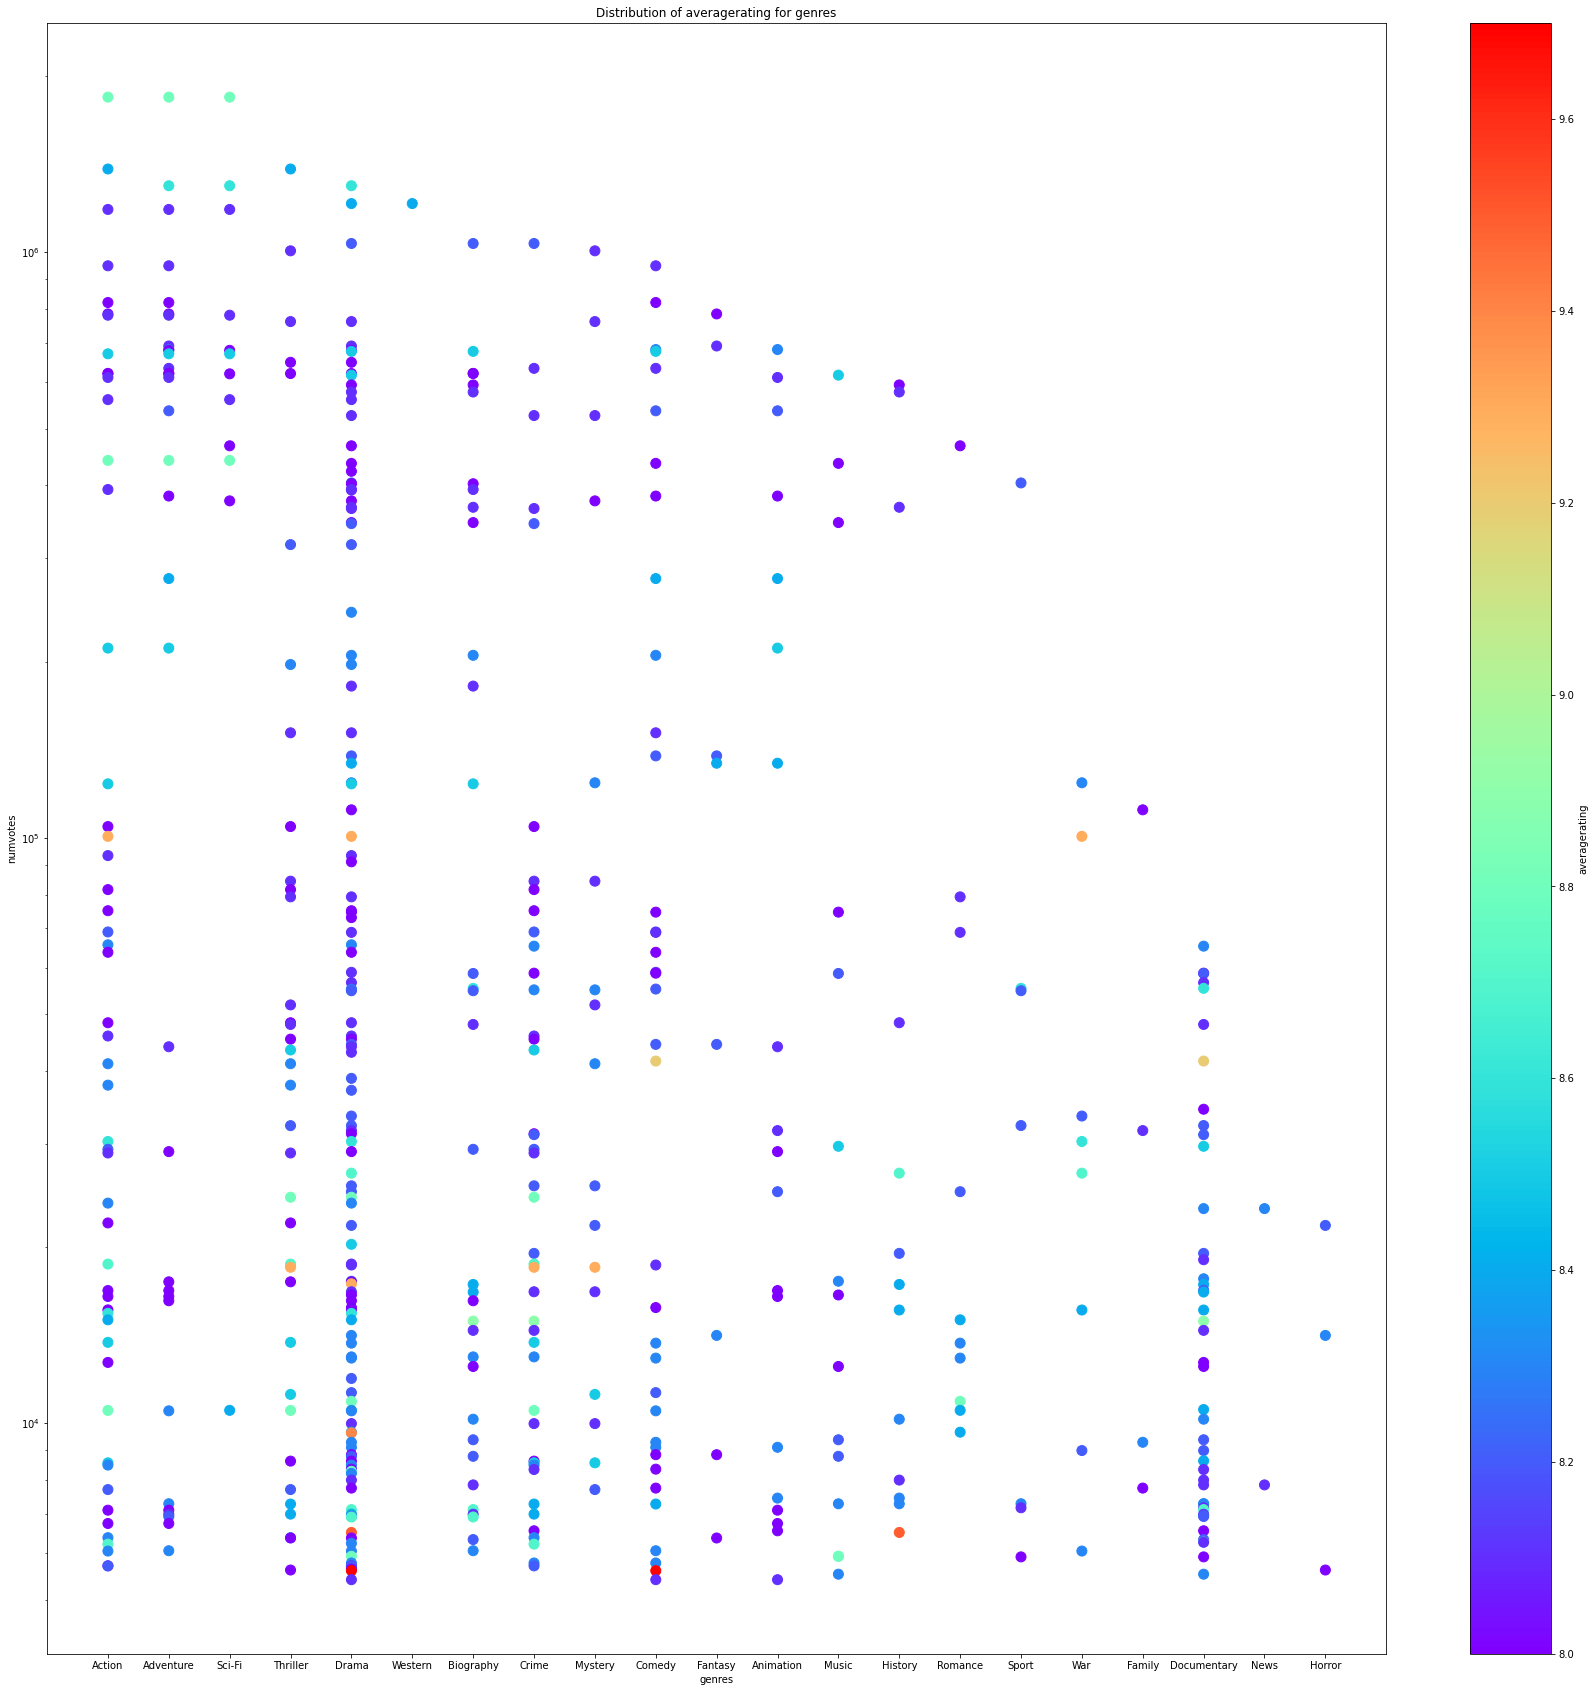

In [401]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(30, 30))
g.plot.scatter(x = "genres", y = "numvotes", c = "averagerating" , s = 100,  colormap = "rainbow",   ax=ax)
ax.set_title('Distribution of averagerating for genres')

ax.set_yscale('log')


In [110]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [324]:
#Why is there more rows when I group the person_id after the movie id...There could be diff directors for the same movie
#Joining movie_b and ratings and directors
qD = """
SELECT
    movie_id,
    averagerating,
    numvotes,
    person_id,
    primary_name AS Director
    
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
JOIN directors
    USING (movie_id)
JOIN persons
    USING(person_id)
GROUP BY movie_id, person_id
ORDER BY movie_id

;
"""
Dir_Sql = pd.read_sql(qD,conn)

In [326]:
#tHIS IS THE rating and directors joined...above 8 with minimum amount of votes

q = """
SELECT 
    g.movie_id,
    g.primary_title,
    g.genres,
    g.averagerating,
    g.numvotes,
    Director,
    COUNT (genres) AS CNTg,
    COUNT (DISTINCT movie_id) AS CNTm,
    COUNT (DISTINCT genres) AS CNTg,
    ROUND (AVG(g.averagerating), 1) as AvgRat_Dir
FROM g
JOIN movieD_df
    USING (movie_id)
GROUP BY director
ORDER BY AvgRat_Dir DESC, g.numvotes DESC, g.genres DESC
"""

intDir = pysqldf(q)
intDir

,movie_id,primary_title,genres,averagerating,numvotes,Director,CNTg,CNTm,CNTg,AvgRat_Dir
0,tt5963218,Aloko Udapadi,Drama,9.5,6509,Bharatha Hettiarachchi,2,1,2,9.5
1,tt5963218,Aloko Udapadi,Drama,9.5,6509,Chathra Weeraman,2,1,2,9.5
2,tt7738784,Peranbu,Drama,9.4,9629,Amudhavan Karuppiah,1,1,1,9.4
3,tt7738784,Peranbu,Drama,9.4,9629,Anjana Krishnakumar,1,1,1,9.4
4,tt7738784,Peranbu,Drama,9.4,9629,Ram,1,1,1,9.4
...,...,...,...,...,...,...,...,...,...,...
211,tt2358913,Berserk: The Golden Age Arc III - The Advent,Action,8.0,6743,Toshiyuki Kubooka,3,1,3,8.0
212,tt5116410,Tower,Animation,8.0,6552,Keith Maitland,3,1,3,8.0
213,tt4309356,Ivy,Drama,8.0,6369,Tolga Karaçelik,3,1,3,8.0
214,tt1698010,TT3D: Closer to the Edge,Documentary,8.0,5913,Richard De Aragues,2,1,2,8.0


In [331]:
#tHIS IS THE rating and directors joined...above 8 with minimum amount of votes

q = """
SELECT 
    g.movie_id,
    g.primary_title,
    g.genres,
    g.averagerating,
    g.numvotes,
    Director

FROM g
JOIN movieD_df
    USING (movie_id)

ORDER BY  g.numvotes DESC, g.genres DESC;
"""

intDir = pysqldf(q)
intDir

,movie_id,primary_title,genres,averagerating,numvotes,Director
0,tt1375666,Inception,Sci-Fi,8.8,1841066,Christopher Nolan
1,tt1375666,Inception,Adventure,8.8,1841066,Christopher Nolan
2,tt1375666,Inception,Action,8.8,1841066,Christopher Nolan
3,tt1345836,The Dark Knight Rises,Thriller,8.4,1387769,Christopher Nolan
4,tt1345836,The Dark Knight Rises,Action,8.4,1387769,Christopher Nolan
...,...,...,...,...,...,...
594,tt1572781,The Disappearance of Haruhi Suzumiya,Drama,8.1,5406,Yasuhiro Takemoto
595,tt1572781,The Disappearance of Haruhi Suzumiya,Comedy,8.1,5406,Tatsuya Ishihara
596,tt1572781,The Disappearance of Haruhi Suzumiya,Comedy,8.1,5406,Yasuhiro Takemoto
597,tt1572781,The Disappearance of Haruhi Suzumiya,Animation,8.1,5406,Tatsuya Ishihara


In [325]:
movieD_df = pd.DataFrame(Dir_Sql)
movieD_df

,movie_id,averagerating,numvotes,person_id,Director
0,tt0063540,7.0,77,nm0712540,Harnam Singh Rawail
1,tt0066787,7.2,43,nm0002411,Mani Kaul
2,tt0069049,6.9,4517,nm0000080,Orson Welles
3,tt0069204,6.1,13,nm0611531,Hrishikesh Mukherjee
4,tt0100275,6.5,119,nm0749914,Raoul Ruiz
...,...,...,...,...,...
86025,tt9913084,6.2,6,nm0812850,Giancarlo Soldi
86026,tt9914286,8.7,136,nm4394529,Ahmet Faik Akinci
86027,tt9914642,8.5,8,nm5300859,Chris Jordan
86028,tt9914942,6.6,5,nm1716653,Laura Jou


TypeError: no numeric data to plot

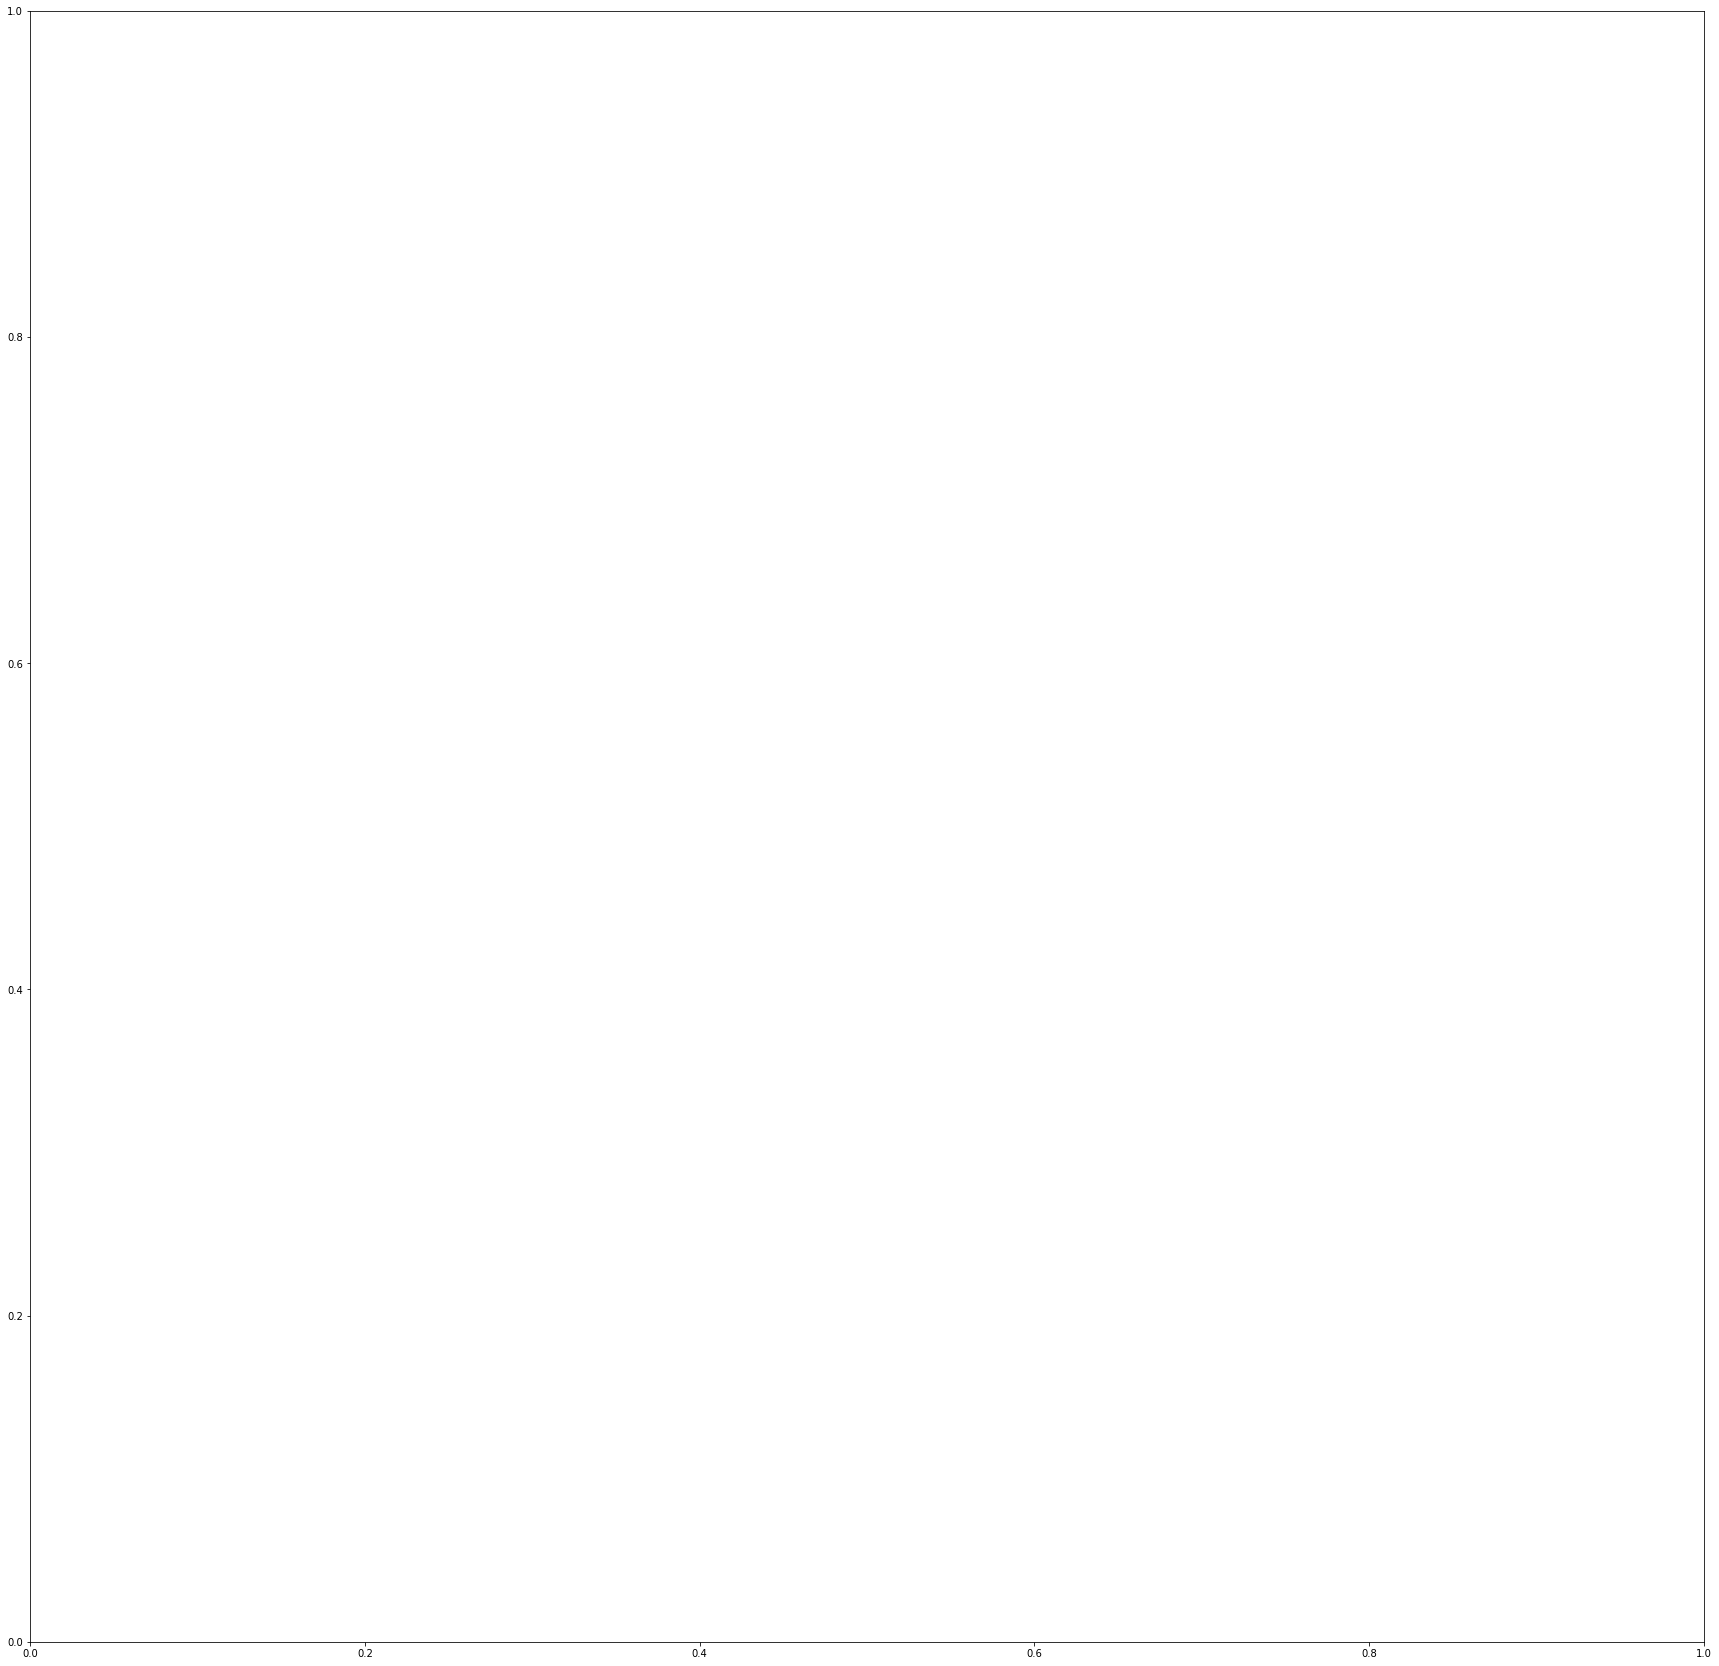

In [251]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(30, 30))
intDir.plot(x = "Director", y = "genres", c = "orange" , s = 100,  colormap = "rainbow",   ax=ax)
ax.set_title('Distribution of averagerating for genres')



In [206]:
#How many movies within the  top Genres does each director have?


count     864
unique    232
top         1
freq      221
dtype: int64

In [238]:
#How many movies does each director have (with preconditions) 
#How many different type of genres does each director have (with preconditions)
#Which genres does each director have
#COUNT (genres) AS CNTg,
   # COUNT ( DISTINCT movie_id) AS CNTm,
   # COUNT (DISTINCT genres) AS DCNTg
# You can put dataframe with group
q = """
SELECT 
    director,
    genres,
    COUNT ( DISTINCT movie_id) AS Movie_Count,
    COUNT (DISTINCT  genres) AS Genre_Count
FROM g
JOIN movieD_df
    USING (movie_id)
WHERE genres IN ("Drama", "Action", "Crime", "Comedy", "Thriller")    
GROUP BY director
ORDER BY Movie_Count DESC
;

"""

intDir = pysqldf(q)
intDir

,Director,genres,Movie_Count,Genre_Count
0,Denis Villeneuve,Crime,3,2
1,Christopher Nolan,Action,3,3
2,Zoya Akhtar,Comedy,2,2
3,Sukumar,Action,2,3
4,Sujoy Ghosh,Thriller,2,3
5,Stephen Chbosky,Drama,2,1
6,S.S. Rajamouli,Action,2,2
7,Quentin Tarantino,Drama,2,2
8,Nuri Bilge Ceylan,Drama,2,1
9,Neeraj Pandey,Action,2,4


In [436]:
#Count the number of movies each genre has
#tHERE ARE 21 Genres

mC ="""

SELECT
    movie_id,
    start_year,
    COUNT (movie_id) AS MCNT,
    genres,
    primary_title,
    averagerating,
    numvotes

FROM g
GROUP BY genres
ORDER BY  MCNT DESC
;


"""

MovieCount = pysqldf(mC)
MovieCount

,movie_id,start_year,MCNT,genres,primary_title,averagerating,numvotes
0,tt0816692,2014,124,Drama,Interstellar,8.6,1299334
1,tt1375666,2010,52,Action,Inception,8.8,1841066
2,tt1645089,2010,44,Documentary,Inside Job,8.3,65304
3,tt0993846,2013,43,Crime,The Wolf of Wall Street,8.2,1035358
4,tt2015381,2014,37,Comedy,Guardians of the Galaxy,8.1,948394
5,tt1345836,2012,36,Thriller,The Dark Knight Rises,8.4,1387769
6,tt0993846,2013,34,Biography,The Wolf of Wall Street,8.2,1035358
7,tt1375666,2010,33,Adventure,Inception,8.8,1841066
8,tt0435761,2010,19,Animation,Toy Story 3,8.3,682218
9,tt1130884,2010,17,Mystery,Shutter Island,8.1,1005960


In [429]:
#Median number of votes per genre...with preconditions...SQL is hard to do median...skewed set
#Look at genre with top ratings and middle number of movies - INSIGHT into potential areas...because of avg and number of votes
#Change title or give stats for them##
gMC = MovieCount.groupby(["genres"]).median()
gMC.sort_values(["MCNT","numvotes", "averagerating" ], ascending = False)

,start_year,MCNT,averagerating,numvotes
genres,,,,
Drama,2014.0,124.0,8.6,1299334.0
Action,2010.0,52.0,8.8,1841066.0
Documentary,2010.0,44.0,8.3,65304.0
Crime,2013.0,43.0,8.2,1035358.0
Comedy,2014.0,37.0,8.1,948394.0
Thriller,2012.0,36.0,8.4,1387769.0
Biography,2013.0,34.0,8.2,1035358.0
Adventure,2010.0,33.0,8.8,1841066.0
Animation,2010.0,19.0,8.3,682218.0


In [441]:
#Keep Table COUNT (movie_id) AS MCNT,
#Number of Directors in each genre with  preconditions
q = """
SELECT 
   
   movie_id,
   genres,
   COUNT (Director) AS DirCount
FROM g
JOIN movieD2_df
    USING (movie_id)
GROUP BY genres
ORDER BY DirCount DESC

;

"""

GenDir = pysqldf(q)
GenDir

,movie_id,genres,DirCount
0,tt0816692,Drama,306
1,tt1375666,Action,199
2,tt1375666,Adventure,181
3,tt2015381,Comedy,142
4,tt0435761,Animation,107
5,tt0993846,Crime,87
6,tt0993846,Biography,86
7,tt1345836,Thriller,84
8,tt1645089,Documentary,77
9,tt1375666,Sci-Fi,63


KeyError: 'MCNT'

In [584]:
#GOOD TABLE
#Which genres does each director have
#COUNT (genres) AS CNTg,
   # COUNT ( DISTINCT movie_id) AS CNTm,
   # COUNT (DISTINCT genres) AS DCNTg
# This takes into account all the directors list added
q = """
SELECT 
    director,
    genres,
    COUNT ( DISTINCT movie_id) AS Movie_Count,
    COUNT (DISTINCT  genres) AS Genre_Count
FROM g
JOIN movieD2_df
    USING (movie_id)
GROUP BY director
HAVING Movie_Count > 1
ORDER BY Movie_Count DESC
;

"""

Dir = pysqldf(q)
Dir

,Director,genres,Movie_Count,Genre_Count
0,Martin Scorsese,Biography,3,7
1,Denis Villeneuve,Crime,3,5
2,Christopher Nolan,Action,3,5
3,Zoya Akhtar,Comedy,2,3
4,Sukumar,Action,2,4
5,Sujoy Ghosh,Mystery,2,4
6,Stephen Chbosky,Drama,2,2
7,S.S. Rajamouli,Action,2,2
8,Quentin Tarantino,Drama,2,3
9,Nuri Bilge Ceylan,Drama,2,1


In [666]:
#Table for plotting Top 25 Directs more than 2 movies and genre by ratings
#Which genres does each director have
#COUNT (genres) AS CNTg,
   # COUNT ( DISTINCT movie_id) AS CNTm,
   # COUNT (DISTINCT genres) AS DCNTg
# This takes into account all the directors list added
 #ROUND (AVG(numvotes), 1) as Avg_Votes
    #ROUND (AVG(averagerating), 1) as Avg_Rat,
q = """
SELECT 
    director,
    movie_id,
    numvotes,
    ROUND (AVG(numvotes), 1) as Avg_Votes,
    averagerating,
    ROUND (AVG(averagerating), 1) as Avg_Rat,
    genres
FROM g
JOIN movieD2_df
    USING (movie_id)
GROUP BY  director, movie_id, genres
ORDER BY averagerating DESC
;

"""

Dir_df = pysqldf(q)
Dir_df

,Director,movie_id,numvotes,Avg_Votes,averagerating,Avg_Rat,genres
0,Quentin Tarantino,tt7131622,5600,5600.0,9.7,9.7,Comedy
1,Quentin Tarantino,tt7131622,5600,5600.0,9.7,9.7,Drama
2,Bharatha Hettiarachchi,tt5963218,6509,6509.0,9.5,9.5,Drama
3,Bharatha Hettiarachchi,tt5963218,6509,6509.0,9.5,9.5,History
4,Chathra Weeraman,tt5963218,6509,6509.0,9.5,9.5,Drama
...,...,...,...,...,...,...,...
592,Yuriy Bykov,tt3560686,8617,8617.0,8.0,8.0,Drama
593,Yuriy Bykov,tt3560686,8617,8617.0,8.0,8.0,Thriller
594,Çagan Irmak,tt2150209,7750,7750.0,8.0,8.0,Comedy
595,Çagan Irmak,tt2150209,7750,7750.0,8.0,8.0,Drama


# Director Visual

In [628]:
Dir_df

,Director,movie_id,numvotes,Avg_Votes,averagerating,Avg_Rat,genres
0,Alper Caglar,tt5813916,100568,59005.5,9.3,8.7,Drama
1,Christopher Nolan,tt1375666,1841066,1478428.4,8.8,8.5,Action
2,Christopher Nolan,tt1375666,1841066,1479911.3,8.8,8.7,Adventure
3,Christopher Nolan,tt1375666,1841066,1479911.3,8.8,8.7,Sci-Fi
4,Can Ulkay,tt6316138,26743,14769.0,8.7,8.4,Drama
5,Anthony Russo,tt4154756,670926,603340.4,8.5,8.6,Action
6,Anthony Russo,tt4154756,670926,603340.4,8.5,8.6,Adventure
7,Anthony Russo,tt4154756,670926,603340.4,8.5,8.6,Sci-Fi
8,Damien Chazelle,tt2582802,616916,526493.0,8.5,8.3,Drama
9,Damien Chazelle,tt2582802,616916,526493.0,8.5,8.3,Music


Text(0.5, 1.0, 'Distribution of Genres by Budget')

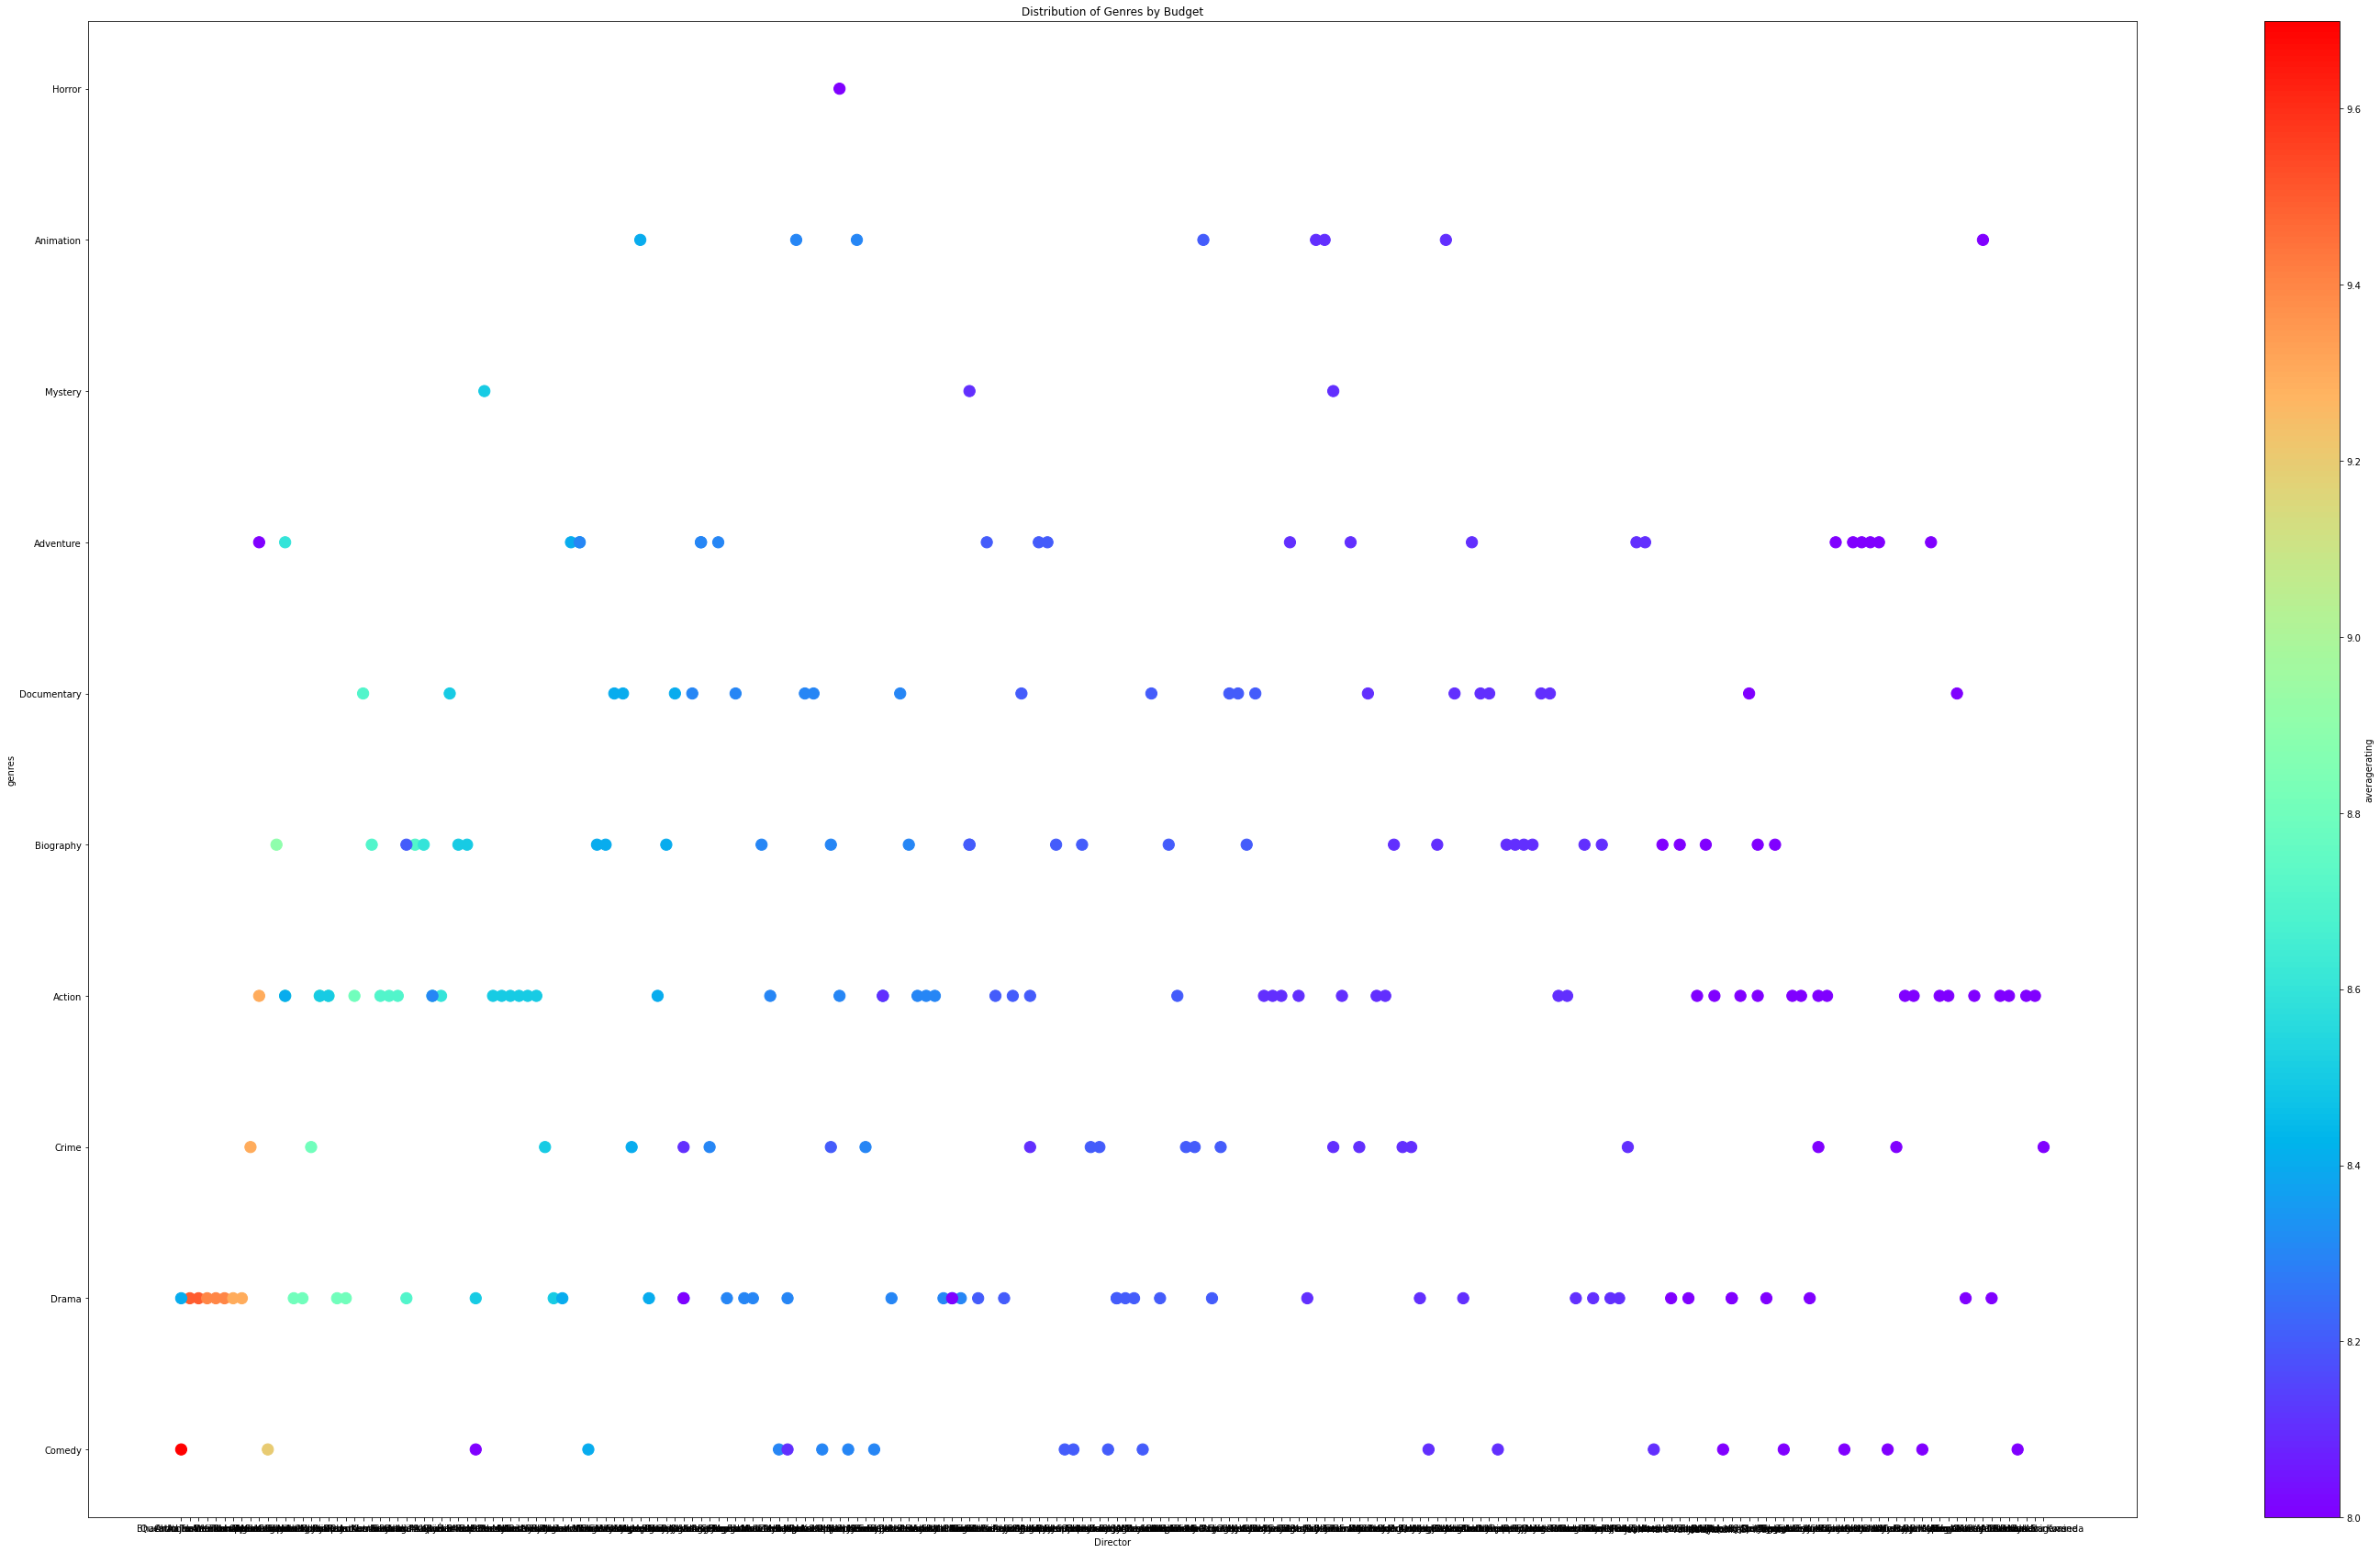

In [664]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(50, 30))
Dir_df.plot.scatter(x = "Director", y = "genres", c = "averagerating" ,s = 150,  colormap = "rainbow",   ax=ax)
ax.set_title('Distribution of Genres by Budget')

In [315]:
#Do a pivot table to show genres grouped
Dir.groupby(["genres"]).count()

,Director,Movie_Count,Genre_Count
genres,,,
Action,5,5,5
Adventure,5,5,5
Animation,1,1,1
Biography,1,1,1
Comedy,2,2,2
Crime,1,1,1
Documentary,1,1,1
Drama,10,10,10
Music,1,1,1


In [334]:
#Average rating of movies for the director in (with votingnum  preconditions only)
#>2 Movies re only 24 directors, with 1 we can possibly give chance to...They have credibility to their name


qD = """
SELECT
    movie_id,
    genres,
    numvotes,
    person_id,
    primary_title,
    primary_name AS Director,
    COUNT ( DISTINCT movie_id) AS Movie_Count,
    COUNT (DISTINCT  genres) AS Genre_Count,
    ROUND (AVG(averagerating), 1) as AvgRat
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
JOIN directors
    USING (movie_id)
JOIN persons
    USING(person_id)
WHERE numvotes >= "5330"
GROUP BY Director
HAVING AvgRat >= 8
ORDER BY AvgRat DESC, Movie_Count DESC

;
"""
Dir_Sql = pd.read_sql(qD,conn)

movieD1_df = pd.DataFrame(Dir_Sql)
movieD1_df

,movie_id,genres,numvotes,person_id,primary_title,Director,Movie_Count,Genre_Count,AvgRat
0,tt5963218,"Drama,History",6509,nm8529623,Aloko Udapadi,Bharatha Hettiarachchi,1,1,9.5
1,tt5963218,"Drama,History",6509,nm8359417,Aloko Udapadi,Chathra Weeraman,1,1,9.5
2,tt7738784,Drama,9629,nm9988436,Peranbu,Amudhavan Karuppiah,1,1,9.4
3,tt7738784,Drama,9629,nm6041686,Peranbu,Anjana Krishnakumar,1,1,9.4
4,tt7738784,Drama,9629,nm3591496,Peranbu,Ram,1,1,9.4
5,tt5354160,"Crime,Mystery,Thriller",18470,nm2755490,Aynabaji,Amitabh Reza Chowdhury,1,1,9.3
6,tt2170667,Drama,17308,nm1919905,Wheels,Donavon Warren,1,1,9.3
7,tt2170667,Drama,17308,nm2871077,Wheels,Tim Gagliardo,1,1,9.3
8,tt2592910,"Comedy,Documentary",41560,nm2339782,CM101MMXI Fundamentals,Murat Dündar,1,1,9.2
9,tt5275892,"Biography,Crime,Documentary",14946,nm1554601,O.J.: Made in America,Ezra Edelman,1,1,8.9


In [370]:
#Keep Table
#Number of Directors in each genre with  preconditions
gD_count = GenDir.groupby("genres").count().sort_values("Director", ascending = False)
gD_count

KeyError: 'Director'

In [558]:
#Join director and broken out genre table, only list the top 5 genres from these directors
#How many directors fit under the top 5 genres each - 13
#From the directors which ones have the top 5 genres
#WHERE g.genres in ("Drama","Action", "Comedy", "Thriller", "Documentary")
#Count the number of movies in each genre with preconditions
qdr ="""

SELECT
   g.movie_id,
   g.genres,
   g.primary_title,
   g.averagerating,
   Director,
   Movie_Count,
   Genre_Count,
   AvgRat
FROM g
INNER JOIN movieD1_df AS  mD
    USING (movie_id)

GROUP BY movie_id


;

"""


int1Dir = pysqldf(qdr)
int1Dir

,movie_id,genres,primary_title,averagerating,Director,Movie_Count,Genre_Count,AvgRat
0,tt0770802,Documentary,Samsara,8.5,Ron Fricke,1,1,8.5
1,tt1345836,Action,The Dark Knight Rises,8.4,Christopher Nolan,4,4,8.4
2,tt1431045,Action,Deadpool,8.0,Tim Miller,1,1,8.0
3,tt1572781,Animation,The Disappearance of Haruhi Suzumiya,8.1,Tatsuya Ishihara,1,1,8.1
4,tt1587707,Comedy,Exit Through the Gift Shop,8.0,Banksy,1,1,8.0
5,tt1618448,Adventure,Racing Extinction,8.2,Louie Psihoyos,1,1,8.2
6,tt1620933,Action,Paan Singh Tomar,8.2,Tigmanshu Dhulia,1,1,8.2
7,tt1634013,Adventure,Montevideo: Taste of a Dream,8.3,Dragan Bjelogrlic,2,2,8.3
8,tt1645089,Crime,Inside Job,8.3,Charles Ferguson,1,1,8.3
9,tt1646967,Adventure,The Art of Flight,8.3,Curt Morgan,1,1,8.3


In [555]:
#Joining of the the tables


qD = """
SELECT
    movie_id,
    primary_name AS Director
    
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
JOIN directors
    USING (movie_id)
JOIN persons
    USING(person_id)



;
"""
Dir_Sql = pd.read_sql(qD,conn)

movieD2_df = pd.DataFrame(Dir_Sql)
movieD2_df

,movie_id,Director
0,tt0063540,Harnam Singh Rawail
1,tt0063540,Harnam Singh Rawail
2,tt0063540,Harnam Singh Rawail
3,tt0063540,Harnam Singh Rawail
4,tt0066787,Mani Kaul
...,...,...
181382,tt9914642,Chris Jordan
181383,tt9914642,Chris Jordan
181384,tt9914942,Laura Jou
181385,tt9914942,Laura Jou


In [ ]:
#How many different type of genres does each director have 

In [ ]:
#Top 25 directors Scatter rankings

In [333]:
#directors only
sql_query = pd.read_sql_query ('''
                               SELECT
                             *
                               FROM directors
                               JOIN persons
                                   USING (person_id)
                            
                               ORDER BY person_id
                               ''', conn)

movieD_df = pd.DataFrame(sql_query)
movieD_df

,movie_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0069049,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer"
1,tt0069049,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer"
2,tt3715320,nm0000095,Woody Allen,1935.0,NaN,"writer,director,actor"
3,tt1605783,nm0000095,Woody Allen,1935.0,NaN,"writer,director,actor"
4,tt2870756,nm0000095,Woody Allen,1935.0,NaN,"writer,director,actor"
...,...,...,...,...,...,...
291166,tt8743182,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer"
291167,tt8743182,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer"
291168,tt8743182,nm9993381,Zoltán Vékony,NaN,NaN,"director,cinematographer,music_department"
291169,tt8743182,nm9993381,Zoltán Vékony,NaN,NaN,"director,cinematographer,music_department"


# Look at Budget- state limitations
# Use

In [450]:
#1544 Rows
q = """
SELECT 
   averagerating,
   numvotes,
   movie_id,
   genres,
   Director,
   primary_title
FROM g
JOIN movieD2_df
    USING (movie_id)



;

"""

BudMovie = pysqldf(q)
BudMovie

,averagerating,numvotes,movie_id,genres,Director,primary_title
0,8.8,1841066,tt1375666,Action,Christopher Nolan,Inception
1,8.8,1841066,tt1375666,Adventure,Christopher Nolan,Inception
2,8.8,1841066,tt1375666,Sci-Fi,Christopher Nolan,Inception
3,8.4,1387769,tt1345836,Action,Christopher Nolan,The Dark Knight Rises
4,8.4,1387769,tt1345836,Action,Christopher Nolan,The Dark Knight Rises
...,...,...,...,...,...,...
1539,8.1,5406,tt1572781,Comedy,Yasuhiro Takemoto,The Disappearance of Haruhi Suzumiya
1540,8.1,5406,tt1572781,Drama,Tatsuya Ishihara,The Disappearance of Haruhi Suzumiya
1541,8.1,5406,tt1572781,Drama,Tatsuya Ishihara,The Disappearance of Haruhi Suzumiya
1542,8.1,5406,tt1572781,Drama,Yasuhiro Takemoto,The Disappearance of Haruhi Suzumiya


In [452]:
#Import CSV to DF
#Join DF on movie name and primary title to current dataframe
#5782 rows
Bud_df = pd.read_csv('movie_budgets.csv')
Bud_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
#Remove necessary characters from string
Bud_df["production_budget"]=Bud_df["production_budget"].str.strip("&")
Bud_df["production_budget"]=Bud_df["production_budget"].str.replace(",", "")

In [480]:

#Convert Budget from string to int necessary
Bud_df["production_budget"]=Bud_df["production_budget"].astype(int) 
Bud_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(4)
memory usage: 271.2+ KB


AttributeError: Can only use .str accessor with string values!

In [485]:
#Joining by names narrowed the list to 638 rows
q = """
SELECT
*
FROM BudMovie AS bm
JOIN Bud_df bd
    ON bm.primary_title = bd.movie
;

"""
bud_join= pysqldf(q)
bud_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   averagerating      638 non-null    float64
 1   numvotes           638 non-null    int64  
 2   movie_id           638 non-null    object 
 3   genres             638 non-null    object 
 4   Director           638 non-null    object 
 5   primary_title      638 non-null    object 
 6   id                 638 non-null    int64  
 7   release_date       638 non-null    object 
 8   movie              638 non-null    object 
 9   production_budget  638 non-null    int64  
 10  domestic_gross     638 non-null    object 
 11  worldwide_gross    638 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 59.9+ KB


In [515]:
#Refine the joined budget list.  
#Look to see if the top genres are top and if the same directors for the same movies are still good
q ="""
SELECT
    movie_id,
    movie,
    Director,
    genres,
    averagerating,
    numvotes,
    production_budget AS pbud
FROM bud_join
ORDER BY pbud DESC
;

"""
budget_df= pysqldf(q)
budget_df

,movie_id,movie,Director,genres,averagerating,numvotes,pbud
0,tt4154756,Avengers: Infinity War,Anthony Russo,Action,8.5,670926,300000000
1,tt4154756,Avengers: Infinity War,Anthony Russo,Action,8.5,670926,300000000
2,tt4154756,Avengers: Infinity War,Anthony Russo,Action,8.5,670926,300000000
3,tt4154756,Avengers: Infinity War,Anthony Russo,Action,8.5,670926,300000000
4,tt4154756,Avengers: Infinity War,Anthony Russo,Action,8.5,670926,300000000
...,...,...,...,...,...,...,...
633,tt2375605,The Act of Killing,Christine Cynn,Crime,8.2,31115,1000000
634,tt2375605,The Act of Killing,Joshua Oppenheimer,Crime,8.2,31115,1000000
635,tt2375605,The Act of Killing,Anonymous,Documentary,8.2,31115,1000000
636,tt2375605,The Act of Killing,Christine Cynn,Documentary,8.2,31115,1000000


In [499]:
#Formatting Budget https://www.markhneedham.com/blog/2021/04/11/pandas-format-dataframe-numbers-commas-decimals/
#budget_df = budget_df.style.format({
    "pbud": "{:,d}",})


AttributeError: 'Styler' object has no attribute 'style'

In [501]:
budget_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       54 non-null     object 
 1   movie          54 non-null     object 
 2   Director       54 non-null     object 
 3   genres         54 non-null     object 
 4   averagerating  54 non-null     float64
 5   pbud           54 non-null     int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.7+ KB


In [529]:
#Look at average budget for genres

q ="""
SELECT
    movie_id,
    movie,
    Director,
    genres,
    averagerating,
    ROUND (AVG(numvotes), 0) as Avg_Votes,
    pbud,
    ROUND (AVG(pbud), 0) as Avg_Bud
FROM budget_df
GROUP BY genres
ORDER BY Avg_Bud DESC, Avg_Votes DESC
;
"""
budA_df= pysqldf(q)
budA_df

,movie_id,movie,Director,genres,averagerating,Avg_Votes,pbud,Avg_Bud
0,tt4154756,Avengers: Infinity War,Anthony Russo,Sci-Fi,8.5,717006.0,300000000,215685185.0
1,tt4154756,Avengers: Infinity War,Anthony Russo,Adventure,8.5,579015.0,300000000,172581481.0
2,tt4154756,Avengers: Infinity War,Anthony Russo,Action,8.5,553293.0,300000000,149584071.0
3,tt0435761,Toy Story 3,Lee Unkrich,Animation,8.3,403315.0,200000000,145180000.0
4,tt0435761,Toy Story 3,Lee Unkrich,Comedy,8.3,494449.0,200000000,140688312.0
5,tt1345836,The Dark Knight Rises,Christopher Nolan,Thriller,8.4,909970.0,275000000,107923077.0
6,tt1853728,Django Unchained,Quentin Tarantino,Western,8.4,1211405.0,100000000,100000000.0
7,tt1856101,Blade Runner 2049,Denis Villeneuve,Mystery,8.0,480098.0,185000000,84240000.0
8,tt1856101,Blade Runner 2049,Denis Villeneuve,Drama,8.0,358241.0,185000000,46645349.0
9,tt1663202,The Revenant,Alejandro G. Iñárritu,Biography,8.0,405768.0,135000000,40519231.0


In [554]:
#Look at top directors (5) Are they on the list

#Drama 86, Biogrpahy 26, Crime 15, Doc and Mystery 10 for representations with under 100 Mill budget
q ="""
SELECT
    movie_id,
    movie,
    Director,
    genres,
    averagerating,
    ROUND (AVG(numvotes), 0) as Avg_Votes,
    pbud,
    COUNT (genres) AS Gen_Count,
    ROUND (AVG(pbud), 0) as Avg_Bud
FROM budget_df
GROUP BY director, genres
HAVING Avg_Bud < 100000000
ORDER BY Gen_Count DESC, Avg_Bud ASC,Avg_Votes DESC 
;
"""
budDir_df= pysqldf(q)
budDir_df

,movie_id,movie,Director,genres,averagerating,Avg_Votes,pbud,Gen_Count,Avg_Bud
0,tt2631186,Baahubali: The Beginning,S.S. Rajamouli,Action,8.1,78388.0,40000000,13,34615385.0
1,tt2631186,Baahubali: The Beginning,S.S. Rajamouli,Drama,8.1,78388.0,40000000,13,34615385.0
2,tt1856101,Blade Runner 2049,Denis Villeneuve,Drama,8.0,289638.0,185000000,7,88771429.0
3,tt1856101,Blade Runner 2049,Denis Villeneuve,Mystery,8.0,289638.0,185000000,7,88771429.0
4,tt5074352,Dangal,Nitesh Tiwari,Action,8.5,123638.0,9500000,5,9500000.0
5,tt5074352,Dangal,Nitesh Tiwari,Biography,8.5,123638.0,9500000,5,9500000.0
6,tt5074352,Dangal,Nitesh Tiwari,Drama,8.5,123638.0,9500000,5,9500000.0
7,tt3863552,Bajrangi Bhaijaan,Kabir Khan,Action,8.0,63747.0,13000000,5,13000000.0
8,tt3863552,Bajrangi Bhaijaan,Kabir Khan,Comedy,8.0,63747.0,13000000,5,13000000.0
9,tt3863552,Bajrangi Bhaijaan,Kabir Khan,Drama,8.0,63747.0,13000000,5,13000000.0


In [544]:
#Plot the genres by the budget


q ="""
SELECT
    movie_id,
    genres,
    averagerating,
    pbud
FROM budget_df
ORDER BY pbud
;
"""
budGen_df= pysqldf(q)
budGen_df

,movie_id,genres,averagerating,pbud
0,tt2375605,Crime,8.2,1000000
1,tt2375605,Crime,8.2,1000000
2,tt2375605,Crime,8.2,1000000
3,tt2375605,Documentary,8.2,1000000
4,tt2375605,Documentary,8.2,1000000
...,...,...,...,...
633,tt4154756,Sci-Fi,8.5,300000000
634,tt4154756,Sci-Fi,8.5,300000000
635,tt4154756,Sci-Fi,8.5,300000000
636,tt4154756,Sci-Fi,8.5,300000000


Text(0.5, 1.0, 'Distribution of Genres by Budget')

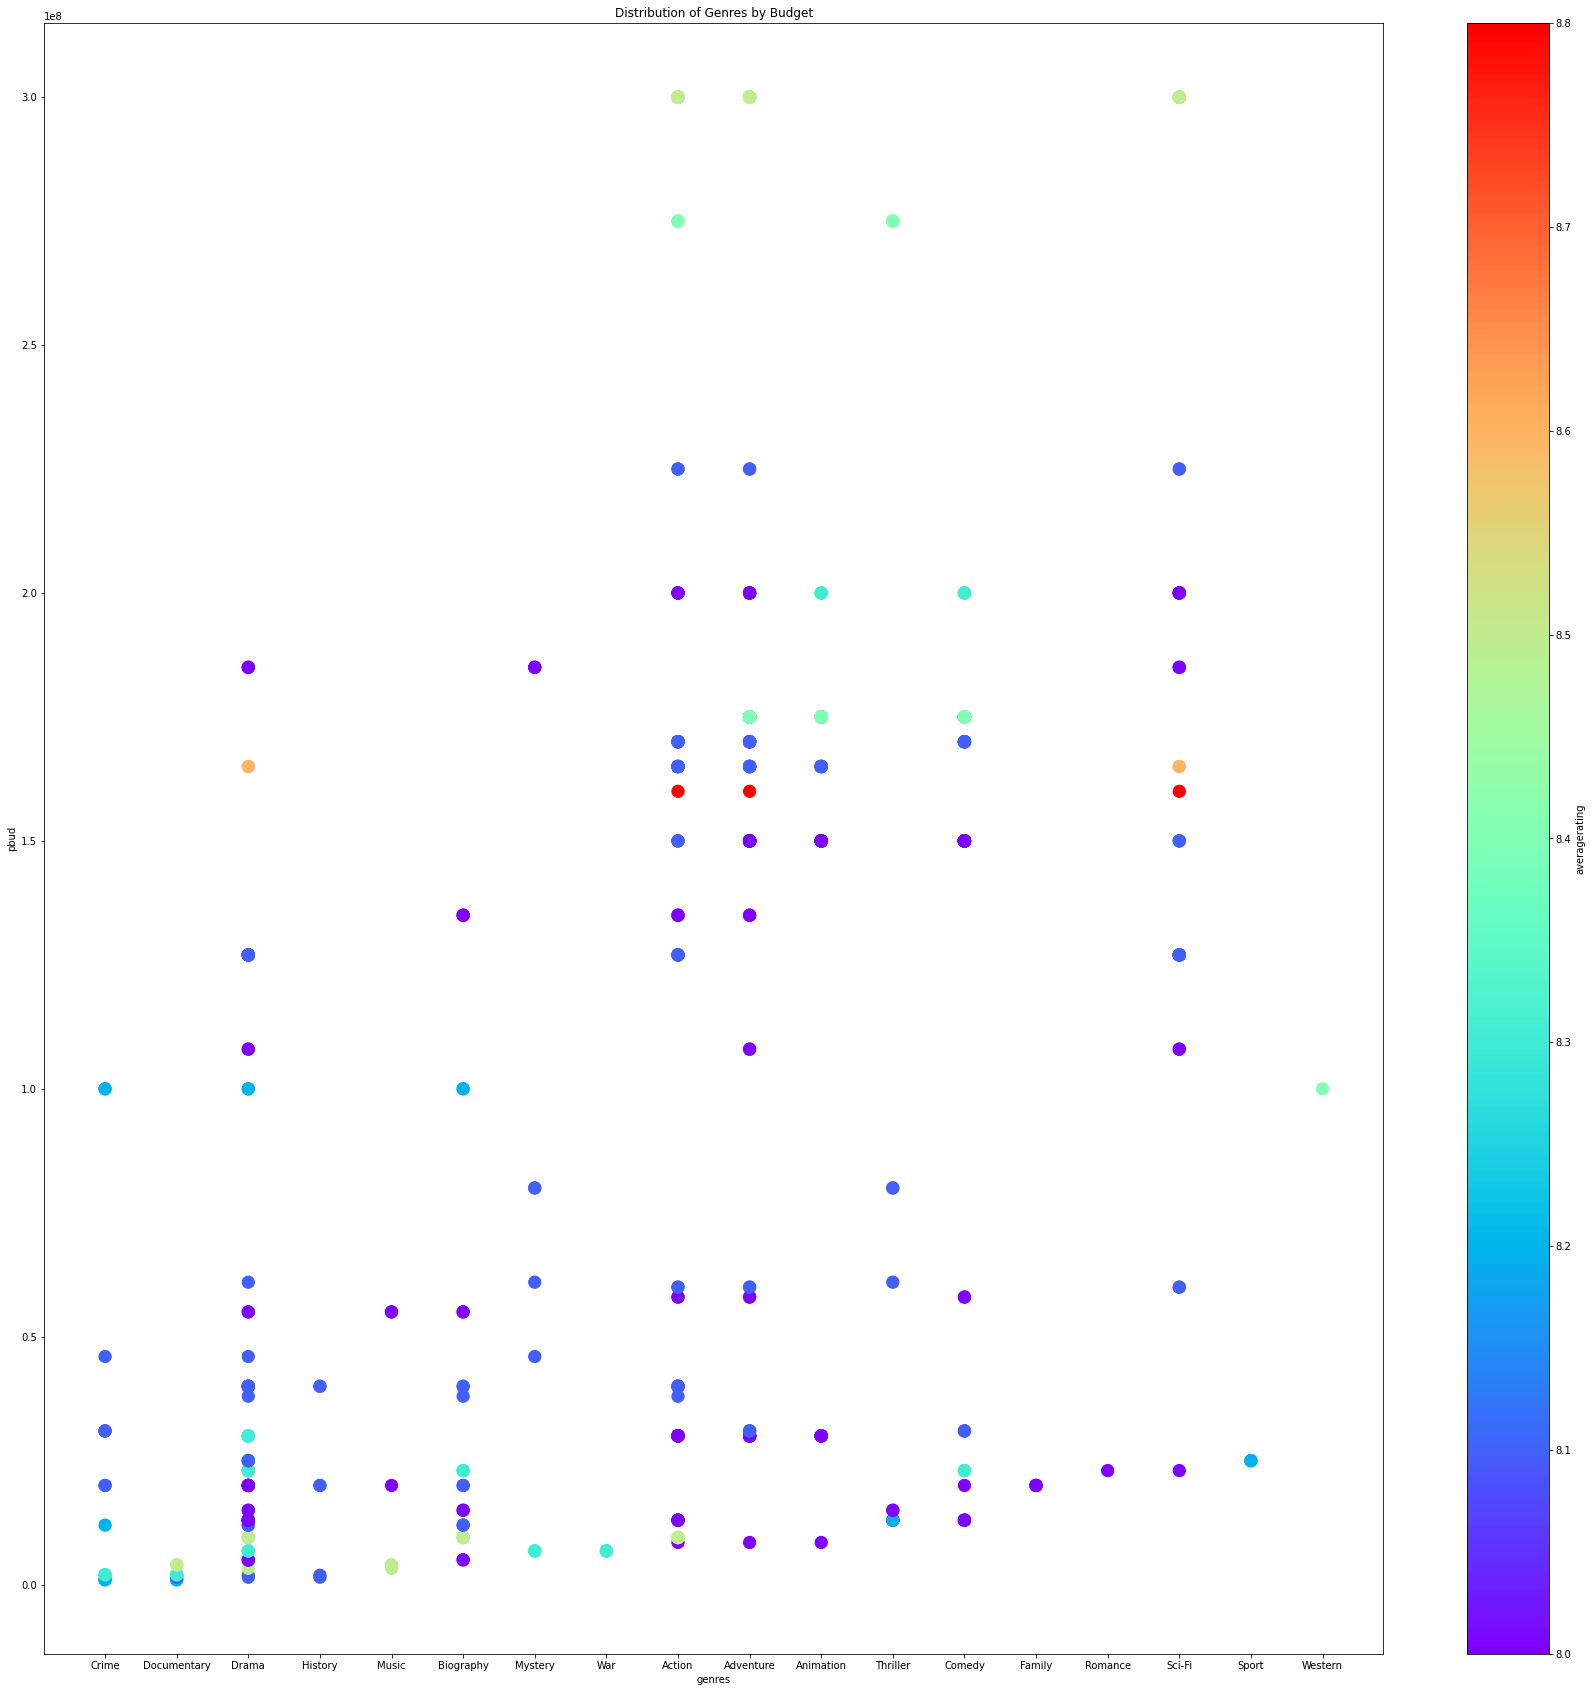

In [598]:
#Plot the genres by Budget
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(30, 30))
budGen_df.plot.scatter(x = "genres", y = "pbud" , c = "averagerating" ,s = 150,  colormap = "rainbow",   ax=ax)
ax.set_title('Distribution of Genres by Budget')